# CNN 

 ## Importações

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import statistics as stats

import random
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle

from sklearn.model_selection import train_test_split
import sklearn

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import stats

## Configurações

In [3]:
batch_size = 2
img_width = 128
img_height = 128
num_classes=5
image_count = 711


## Importando dataset

In [4]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

## Separando Dataset

In [5]:
x_splitted = []
y_splitted = []

for pos, label in enumerate(y):
   if label>= 0 and label <=4:
    x_splitted.append(X[pos])
    y_splitted.append(y[pos])
    
print(len(y_splitted))

x_val = np.asarray(x_splitted[0:119])
y_val = np.asarray(y_splitted[0:119])
x_train = np.asarray(x_splitted[120:401])
y_train = np.asarray(y_splitted[120:401])

402


## Modelo com Augumentation

In [8]:
data_augumentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
      
    layers.RandomRotation(30, fill_mode='reflect',
    interpolation='bilinear',),
    layers.RandomZoom(0.2),
  ]
)

model_augumentation = Sequential([
    data_augumentation,
    layers.Conv2D(8,3, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(128,128,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    layers.Conv2D(8,3, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(128,128,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    layers.Conv2D(16,3, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(128,128,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    layers.Conv2D(16,3, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(128,128,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    layers.Conv2D(16,3, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(128,128,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    layers.Conv2D(16,3, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(128,128,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    layers.Conv2D(16,3, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(128,128,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    layers.Conv2D(32,3, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(128,128,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    layers.Conv2D(64,3, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(128,128,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    layers.Conv2D(64,3, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(128,128,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    layers.Flatten(),
    layers.Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001), activation='selu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
], name='augumentation_10CL')


## Treinando com Augumentation

In [9]:
#Compilando
model_augumentation.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])

#Checkpoints
checkpoint_filepath = './checkpoints/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_sparse_categorical_accuracy',
    mode='max',
    save_best_only=True)

#Treinando
epochs = 1000

history_augumentation = model_augumentation.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), batch_size = batch_size, epochs=epochs, callbacks=[model_checkpoint_callback])

#Carregando checkpoint
model_augumentation.load_weights(checkpoint_filepath)

model_augumentation.summary()

Epoch 1/1000
141/141 [==============================] - 4s 16ms/step - loss: 1.6870 - sparse_categorical_accuracy: 0.2776 - val_loss: 1.4221 - val_sparse_categorical_accuracy: 0.3529
Epoch 2/1000
141/141 [==============================] - 2s 14ms/step - loss: 1.3080 - sparse_categorical_accuracy: 0.4306 - val_loss: 1.3134 - val_sparse_categorical_accuracy: 0.3950
Epoch 3/1000
141/141 [==============================] - 2s 14ms/step - loss: 1.2726 - sparse_categorical_accuracy: 0.4057 - val_loss: 1.3267 - val_sparse_categorical_accuracy: 0.3361
Epoch 4/1000
141/141 [==============================] - 2s 15ms/step - loss: 1.2600 - sparse_categorical_accuracy: 0.4093 - val_loss: 1.3598 - val_sparse_categorical_accuracy: 0.4622
Epoch 5/1000
141/141 [==============================] - 2s 15ms/step - loss: 1.1288 - sparse_categorical_accuracy: 0.4982 - val_loss: 1.3125 - val_sparse_categorical_accuracy: 0.4958
Epoch 6/1000
141/141 [==============================] - 2s 15ms/step - loss: 1.1445 -

141/141 [==============================] - 2s 13ms/step - loss: 0.8424 - sparse_categorical_accuracy: 0.6655 - val_loss: 0.9548 - val_sparse_categorical_accuracy: 0.6387
Epoch 46/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.8285 - sparse_categorical_accuracy: 0.6762 - val_loss: 0.8181 - val_sparse_categorical_accuracy: 0.6807
Epoch 47/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.8090 - sparse_categorical_accuracy: 0.6904 - val_loss: 0.8690 - val_sparse_categorical_accuracy: 0.6555
Epoch 48/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.8477 - sparse_categorical_accuracy: 0.6263 - val_loss: 0.9356 - val_sparse_categorical_accuracy: 0.5714
Epoch 49/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.8050 - sparse_categorical_accuracy: 0.6833 - val_loss: 0.8770 - val_sparse_categorical_accuracy: 0.5966
Epoch 50/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.8827 - sparse_

141/141 [==============================] - 2s 14ms/step - loss: 0.5655 - sparse_categorical_accuracy: 0.7794 - val_loss: 0.5495 - val_sparse_categorical_accuracy: 0.7059
Epoch 90/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.5427 - sparse_categorical_accuracy: 0.7580 - val_loss: 0.6119 - val_sparse_categorical_accuracy: 0.6639
Epoch 91/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.6190 - sparse_categorical_accuracy: 0.7616 - val_loss: 0.5497 - val_sparse_categorical_accuracy: 0.6891
Epoch 92/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.5660 - sparse_categorical_accuracy: 0.7722 - val_loss: 0.6887 - val_sparse_categorical_accuracy: 0.6639
Epoch 93/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.5097 - sparse_categorical_accuracy: 0.7900 - val_loss: 0.6307 - val_sparse_categorical_accuracy: 0.6723
Epoch 94/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.5848 - sparse_

141/141 [==============================] - 2s 15ms/step - loss: 0.5724 - sparse_categorical_accuracy: 0.7722 - val_loss: 1.3114 - val_sparse_categorical_accuracy: 0.6218
Epoch 134/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.4381 - sparse_categorical_accuracy: 0.8399 - val_loss: 0.4463 - val_sparse_categorical_accuracy: 0.8067
Epoch 135/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.5273 - sparse_categorical_accuracy: 0.8114 - val_loss: 0.4413 - val_sparse_categorical_accuracy: 0.8403
Epoch 136/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.5616 - sparse_categorical_accuracy: 0.8221 - val_loss: 0.5066 - val_sparse_categorical_accuracy: 0.7563
Epoch 137/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.4411 - sparse_categorical_accuracy: 0.8434 - val_loss: 0.5713 - val_sparse_categorical_accuracy: 0.7059
Epoch 138/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.4044 - sp

141/141 [==============================] - 2s 14ms/step - loss: 0.4017 - sparse_categorical_accuracy: 0.8719 - val_loss: 0.8246 - val_sparse_categorical_accuracy: 0.7983
Epoch 178/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.3795 - sparse_categorical_accuracy: 0.8541 - val_loss: 0.5222 - val_sparse_categorical_accuracy: 0.7899
Epoch 179/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.3973 - sparse_categorical_accuracy: 0.8861 - val_loss: 0.3521 - val_sparse_categorical_accuracy: 0.8319
Epoch 180/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.3516 - sparse_categorical_accuracy: 0.8719 - val_loss: 0.7416 - val_sparse_categorical_accuracy: 0.6807
Epoch 181/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.3729 - sparse_categorical_accuracy: 0.8612 - val_loss: 0.6358 - val_sparse_categorical_accuracy: 0.7647
Epoch 182/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.3923 - sp

141/141 [==============================] - 2s 13ms/step - loss: 0.2953 - sparse_categorical_accuracy: 0.9146 - val_loss: 0.4928 - val_sparse_categorical_accuracy: 0.8319
Epoch 222/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.4118 - sparse_categorical_accuracy: 0.8541 - val_loss: 0.4991 - val_sparse_categorical_accuracy: 0.7983
Epoch 223/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.3379 - sparse_categorical_accuracy: 0.8861 - val_loss: 0.3044 - val_sparse_categorical_accuracy: 0.9076
Epoch 224/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.3185 - sparse_categorical_accuracy: 0.8754 - val_loss: 0.4273 - val_sparse_categorical_accuracy: 0.8824
Epoch 225/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.5365 - sparse_categorical_accuracy: 0.8327 - val_loss: 0.3730 - val_sparse_categorical_accuracy: 0.8908
Epoch 226/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.3578 - sp

141/141 [==============================] - 2s 14ms/step - loss: 0.4339 - sparse_categorical_accuracy: 0.8363 - val_loss: 0.6155 - val_sparse_categorical_accuracy: 0.7143
Epoch 266/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.5340 - sparse_categorical_accuracy: 0.8007 - val_loss: 0.5976 - val_sparse_categorical_accuracy: 0.7395
Epoch 267/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.4596 - sparse_categorical_accuracy: 0.8185 - val_loss: 0.7973 - val_sparse_categorical_accuracy: 0.6387
Epoch 268/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.4630 - sparse_categorical_accuracy: 0.8043 - val_loss: 0.8574 - val_sparse_categorical_accuracy: 0.6639
Epoch 269/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.5433 - sparse_categorical_accuracy: 0.8078 - val_loss: 0.6625 - val_sparse_categorical_accuracy: 0.6555
Epoch 270/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.4663 - sp

141/141 [==============================] - 2s 14ms/step - loss: 0.3824 - sparse_categorical_accuracy: 0.8826 - val_loss: 0.4461 - val_sparse_categorical_accuracy: 0.9076
Epoch 310/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.5200 - sparse_categorical_accuracy: 0.8007 - val_loss: 0.4705 - val_sparse_categorical_accuracy: 0.8235
Epoch 311/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.3369 - sparse_categorical_accuracy: 0.8861 - val_loss: 0.5610 - val_sparse_categorical_accuracy: 0.8487
Epoch 312/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2882 - sparse_categorical_accuracy: 0.8932 - val_loss: 0.5915 - val_sparse_categorical_accuracy: 0.7983
Epoch 313/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.3299 - sparse_categorical_accuracy: 0.8968 - val_loss: 0.7986 - val_sparse_categorical_accuracy: 0.6807
Epoch 314/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.3151 - sp

141/141 [==============================] - 2s 15ms/step - loss: 0.3170 - sparse_categorical_accuracy: 0.9075 - val_loss: 0.3219 - val_sparse_categorical_accuracy: 0.9076
Epoch 354/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.3150 - sparse_categorical_accuracy: 0.9004 - val_loss: 0.2913 - val_sparse_categorical_accuracy: 0.9076
Epoch 355/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.2045 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.3387 - val_sparse_categorical_accuracy: 0.9160
Epoch 356/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.2485 - sparse_categorical_accuracy: 0.9359 - val_loss: 0.4547 - val_sparse_categorical_accuracy: 0.8824
Epoch 357/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.2716 - sparse_categorical_accuracy: 0.9217 - val_loss: 0.5116 - val_sparse_categorical_accuracy: 0.8403
Epoch 358/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.2383 - sp

141/141 [==============================] - 2s 14ms/step - loss: 0.2808 - sparse_categorical_accuracy: 0.9146 - val_loss: 0.3824 - val_sparse_categorical_accuracy: 0.9328
Epoch 398/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2925 - sparse_categorical_accuracy: 0.9075 - val_loss: 0.3171 - val_sparse_categorical_accuracy: 0.9076
Epoch 399/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2541 - sparse_categorical_accuracy: 0.9181 - val_loss: 0.2725 - val_sparse_categorical_accuracy: 0.9328
Epoch 400/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2316 - sparse_categorical_accuracy: 0.9324 - val_loss: 0.3528 - val_sparse_categorical_accuracy: 0.8992
Epoch 401/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2114 - sparse_categorical_accuracy: 0.9324 - val_loss: 0.2490 - val_sparse_categorical_accuracy: 0.9496
Epoch 402/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.2661 - sp

141/141 [==============================] - 2s 14ms/step - loss: 0.2559 - sparse_categorical_accuracy: 0.9359 - val_loss: 0.2700 - val_sparse_categorical_accuracy: 0.9244
Epoch 442/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2615 - sparse_categorical_accuracy: 0.9431 - val_loss: 0.3376 - val_sparse_categorical_accuracy: 0.9244
Epoch 443/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2473 - sparse_categorical_accuracy: 0.9324 - val_loss: 0.3240 - val_sparse_categorical_accuracy: 0.9244
Epoch 444/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2177 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.4116 - val_sparse_categorical_accuracy: 0.8908
Epoch 445/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2418 - sparse_categorical_accuracy: 0.9146 - val_loss: 0.3050 - val_sparse_categorical_accuracy: 0.9244
Epoch 446/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2366 - sp

141/141 [==============================] - 2s 14ms/step - loss: 0.2452 - sparse_categorical_accuracy: 0.9324 - val_loss: 0.2710 - val_sparse_categorical_accuracy: 0.9412
Epoch 486/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2824 - sparse_categorical_accuracy: 0.9181 - val_loss: 0.3102 - val_sparse_categorical_accuracy: 0.9328
Epoch 487/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2531 - sparse_categorical_accuracy: 0.9288 - val_loss: 0.3825 - val_sparse_categorical_accuracy: 0.8992
Epoch 488/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.1847 - sparse_categorical_accuracy: 0.9644 - val_loss: 0.3627 - val_sparse_categorical_accuracy: 0.9076
Epoch 489/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.2724 - sparse_categorical_accuracy: 0.9253 - val_loss: 0.3222 - val_sparse_categorical_accuracy: 0.9160
Epoch 490/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2437 - sp

141/141 [==============================] - 2s 14ms/step - loss: 0.1877 - sparse_categorical_accuracy: 0.9466 - val_loss: 0.4173 - val_sparse_categorical_accuracy: 0.8908
Epoch 530/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.3345 - sparse_categorical_accuracy: 0.9004 - val_loss: 0.3161 - val_sparse_categorical_accuracy: 0.9160
Epoch 531/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2412 - sparse_categorical_accuracy: 0.9359 - val_loss: 0.4199 - val_sparse_categorical_accuracy: 0.8824
Epoch 532/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2788 - sparse_categorical_accuracy: 0.9146 - val_loss: 0.2724 - val_sparse_categorical_accuracy: 0.9412
Epoch 533/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2190 - sparse_categorical_accuracy: 0.9431 - val_loss: 0.3391 - val_sparse_categorical_accuracy: 0.9076
Epoch 534/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2495 - sp

141/141 [==============================] - 2s 15ms/step - loss: 0.2052 - sparse_categorical_accuracy: 0.9288 - val_loss: 0.2743 - val_sparse_categorical_accuracy: 0.9160
Epoch 574/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.2400 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.3524 - val_sparse_categorical_accuracy: 0.9160
Epoch 575/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.3111 - sparse_categorical_accuracy: 0.9039 - val_loss: 0.6487 - val_sparse_categorical_accuracy: 0.7983
Epoch 576/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2792 - sparse_categorical_accuracy: 0.9146 - val_loss: 0.5620 - val_sparse_categorical_accuracy: 0.8571
Epoch 577/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.2376 - sparse_categorical_accuracy: 0.9466 - val_loss: 0.3449 - val_sparse_categorical_accuracy: 0.8992
Epoch 578/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.2484 - sp

141/141 [==============================] - 2s 14ms/step - loss: 0.2312 - sparse_categorical_accuracy: 0.9324 - val_loss: 0.4992 - val_sparse_categorical_accuracy: 0.8655
Epoch 618/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2746 - sparse_categorical_accuracy: 0.9110 - val_loss: 0.2915 - val_sparse_categorical_accuracy: 0.9412
Epoch 619/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.1714 - sparse_categorical_accuracy: 0.9644 - val_loss: 0.2790 - val_sparse_categorical_accuracy: 0.9412
Epoch 620/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2134 - sparse_categorical_accuracy: 0.9502 - val_loss: 0.2392 - val_sparse_categorical_accuracy: 0.9412
Epoch 621/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2737 - sparse_categorical_accuracy: 0.9217 - val_loss: 0.2822 - val_sparse_categorical_accuracy: 0.9328
Epoch 622/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2122 - sp

141/141 [==============================] - 2s 15ms/step - loss: 0.2344 - sparse_categorical_accuracy: 0.9324 - val_loss: 0.3868 - val_sparse_categorical_accuracy: 0.9076
Epoch 662/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2359 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.4142 - val_sparse_categorical_accuracy: 0.8655
Epoch 663/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.1755 - sparse_categorical_accuracy: 0.9537 - val_loss: 0.3399 - val_sparse_categorical_accuracy: 0.9076
Epoch 664/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.1395 - sparse_categorical_accuracy: 0.9715 - val_loss: 0.4060 - val_sparse_categorical_accuracy: 0.8908
Epoch 665/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2580 - sparse_categorical_accuracy: 0.9359 - val_loss: 0.2916 - val_sparse_categorical_accuracy: 0.9076
Epoch 666/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.2347 - sp

141/141 [==============================] - 2s 14ms/step - loss: 0.2175 - sparse_categorical_accuracy: 0.9502 - val_loss: 0.6461 - val_sparse_categorical_accuracy: 0.7899
Epoch 706/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2404 - sparse_categorical_accuracy: 0.9288 - val_loss: 0.3720 - val_sparse_categorical_accuracy: 0.8992
Epoch 707/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2206 - sparse_categorical_accuracy: 0.9573 - val_loss: 0.2719 - val_sparse_categorical_accuracy: 0.9328
Epoch 708/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2914 - sparse_categorical_accuracy: 0.9146 - val_loss: 0.3725 - val_sparse_categorical_accuracy: 0.9076
Epoch 709/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2441 - sparse_categorical_accuracy: 0.9288 - val_loss: 0.3842 - val_sparse_categorical_accuracy: 0.8824
Epoch 710/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2444 - sp

141/141 [==============================] - 2s 14ms/step - loss: 0.2572 - sparse_categorical_accuracy: 0.9253 - val_loss: 0.3647 - val_sparse_categorical_accuracy: 0.8824
Epoch 750/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.2490 - sparse_categorical_accuracy: 0.9217 - val_loss: 0.3093 - val_sparse_categorical_accuracy: 0.9412
Epoch 751/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2273 - sparse_categorical_accuracy: 0.9324 - val_loss: 0.4045 - val_sparse_categorical_accuracy: 0.8992
Epoch 752/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2184 - sparse_categorical_accuracy: 0.9359 - val_loss: 0.7195 - val_sparse_categorical_accuracy: 0.8151
Epoch 753/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2303 - sparse_categorical_accuracy: 0.9288 - val_loss: 0.2945 - val_sparse_categorical_accuracy: 0.9328
Epoch 754/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2502 - sp

141/141 [==============================] - 2s 14ms/step - loss: 0.1654 - sparse_categorical_accuracy: 0.9502 - val_loss: 0.2899 - val_sparse_categorical_accuracy: 0.9328
Epoch 794/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2606 - sparse_categorical_accuracy: 0.9217 - val_loss: 0.4867 - val_sparse_categorical_accuracy: 0.8824
Epoch 795/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2600 - sparse_categorical_accuracy: 0.9288 - val_loss: 1.0606 - val_sparse_categorical_accuracy: 0.7395
Epoch 796/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2679 - sparse_categorical_accuracy: 0.9181 - val_loss: 0.2458 - val_sparse_categorical_accuracy: 0.9328
Epoch 797/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2118 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.2313 - val_sparse_categorical_accuracy: 0.9496
Epoch 798/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2616 - sp

141/141 [==============================] - 2s 14ms/step - loss: 0.2285 - sparse_categorical_accuracy: 0.9431 - val_loss: 0.2682 - val_sparse_categorical_accuracy: 0.9328
Epoch 838/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.1901 - sparse_categorical_accuracy: 0.9502 - val_loss: 0.2459 - val_sparse_categorical_accuracy: 0.9496
Epoch 839/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2259 - sparse_categorical_accuracy: 0.9359 - val_loss: 0.3312 - val_sparse_categorical_accuracy: 0.9160
Epoch 840/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2114 - sparse_categorical_accuracy: 0.9502 - val_loss: 0.3083 - val_sparse_categorical_accuracy: 0.9412
Epoch 841/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2014 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.3103 - val_sparse_categorical_accuracy: 0.9076
Epoch 842/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.5798 - sp

141/141 [==============================] - 2s 14ms/step - loss: 0.3425 - sparse_categorical_accuracy: 0.9075 - val_loss: 0.3678 - val_sparse_categorical_accuracy: 0.9160
Epoch 882/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2704 - sparse_categorical_accuracy: 0.9075 - val_loss: 0.2964 - val_sparse_categorical_accuracy: 0.9328
Epoch 883/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.1983 - sparse_categorical_accuracy: 0.9537 - val_loss: 0.2363 - val_sparse_categorical_accuracy: 0.9496
Epoch 884/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.1955 - sparse_categorical_accuracy: 0.9537 - val_loss: 0.2772 - val_sparse_categorical_accuracy: 0.9496
Epoch 885/1000
141/141 [==============================] - 2s 13ms/step - loss: 0.2101 - sparse_categorical_accuracy: 0.9359 - val_loss: 0.2689 - val_sparse_categorical_accuracy: 0.9244
Epoch 886/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2193 - sp

141/141 [==============================] - 2s 15ms/step - loss: 0.1908 - sparse_categorical_accuracy: 0.9359 - val_loss: 0.3329 - val_sparse_categorical_accuracy: 0.9076
Epoch 926/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.2087 - sparse_categorical_accuracy: 0.9431 - val_loss: 0.2754 - val_sparse_categorical_accuracy: 0.9328
Epoch 927/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.2299 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.3070 - val_sparse_categorical_accuracy: 0.9244
Epoch 928/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.1882 - sparse_categorical_accuracy: 0.9644 - val_loss: 0.2996 - val_sparse_categorical_accuracy: 0.9244
Epoch 929/1000
141/141 [==============================] - 2s 14ms/step - loss: 0.2807 - sparse_categorical_accuracy: 0.9359 - val_loss: 0.2996 - val_sparse_categorical_accuracy: 0.9328
Epoch 930/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.2030 - sp

141/141 [==============================] - 2s 14ms/step - loss: 0.1662 - sparse_categorical_accuracy: 0.9644 - val_loss: 0.4982 - val_sparse_categorical_accuracy: 0.8655
Epoch 970/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.1851 - sparse_categorical_accuracy: 0.9609 - val_loss: 0.3043 - val_sparse_categorical_accuracy: 0.9244
Epoch 971/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.2608 - sparse_categorical_accuracy: 0.9253 - val_loss: 0.3136 - val_sparse_categorical_accuracy: 0.9328
Epoch 972/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.2704 - sparse_categorical_accuracy: 0.9253 - val_loss: 0.6140 - val_sparse_categorical_accuracy: 0.8403
Epoch 973/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.1609 - sparse_categorical_accuracy: 0.9680 - val_loss: 0.2498 - val_sparse_categorical_accuracy: 0.9412
Epoch 974/1000
141/141 [==============================] - 2s 15ms/step - loss: 0.1921 - sp

 conv2d_16 (Conv2D)          (None, 2, 2, 16)          2320      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 1, 1, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 1, 32)          4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 1, 1, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 1, 1, 64)          18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_19

## Carregando Modelo

In [10]:
#Carregando checkpoint
model_augumentation.load_weights('./checkpoints/checkpoint')

summary = model_augumentation.summary()

Model: "augumentation_10CL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 8)       224       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 16) 

## Resultados com Augumentation

range(1, 1000)


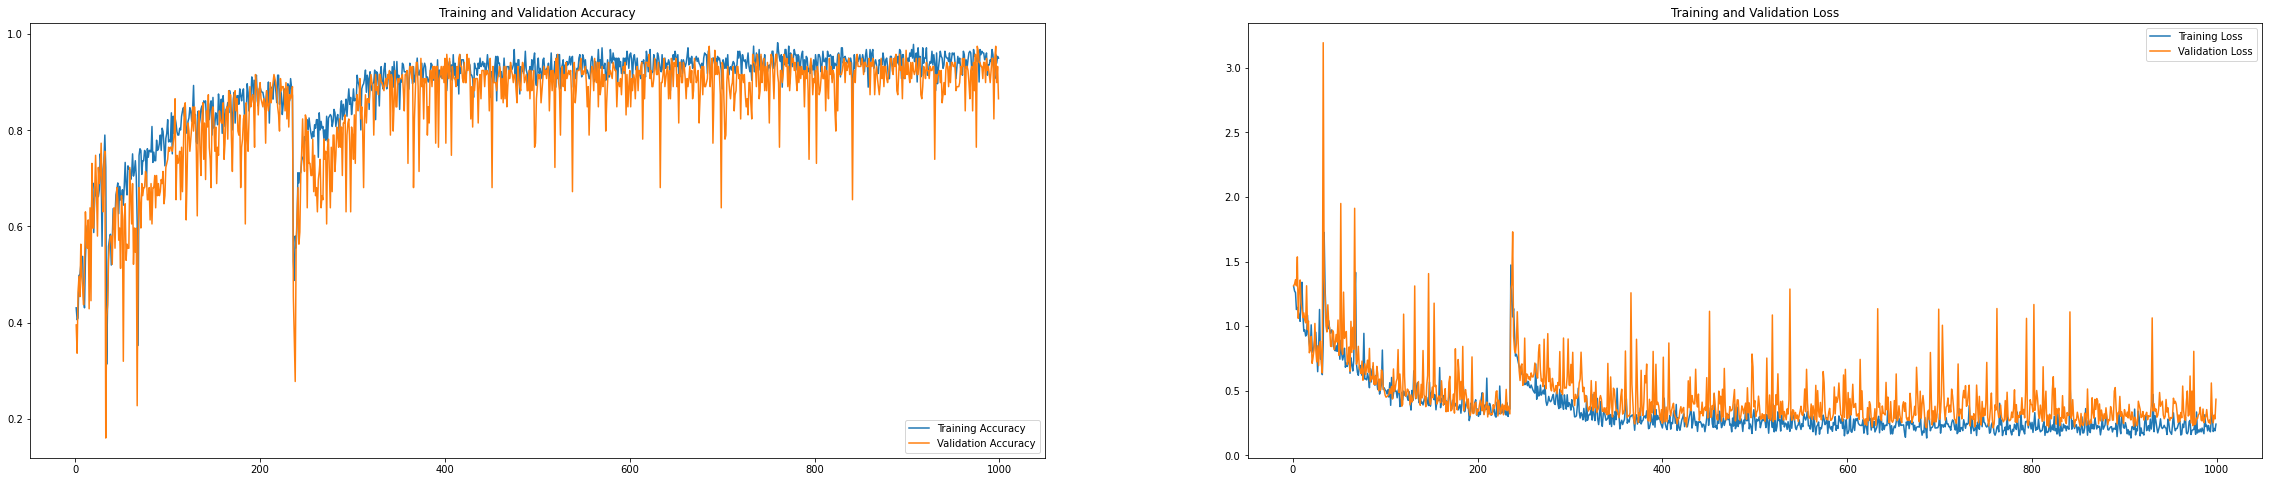

In [11]:
import statistics 

acc = history_augumentation.history['sparse_categorical_accuracy'][1:1000]
val_acc = history_augumentation.history['val_sparse_categorical_accuracy'][1:1000]

loss = history_augumentation.history['loss'][1:1000]
val_loss = history_augumentation.history['val_loss'][1:1000]

epochs_range = range(1,1000)
print(epochs_range)

plt.figure(figsize=(40, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./statistics/training_x_val.png',  dpi = 300)
plt.show()



## Evaluate

In [12]:
print("Evaluate on test data")
results = model_augumentation.evaluate(x_val, y_val, batch_size=2)
print("test loss, test acc:", results)

Evaluate on test data
60/60 [==============================] - 0s 5ms/step - loss: 0.2134 - sparse_categorical_accuracy: 0.9748
test loss, test acc: [0.2134401500225067, 0.9747899174690247]


## Matriz de Confusão

In [13]:
predictions = model_augumentation.predict(x_val)
pred_labels = []
for predict in predictions:
    pred_labels.append(np.argmax(predict))
confusion_matrix = tf.math.confusion_matrix(y_val, pred_labels)
print(confusion_matrix)

tf.Tensor(
[[17  0  0  0  0]
 [ 0 27  0  1  0]
 [ 0  0 21  0  0]
 [ 0  1  0 27  0]
 [ 1  0  0  0 24]], shape=(5, 5), dtype=int32)


## Heatmap

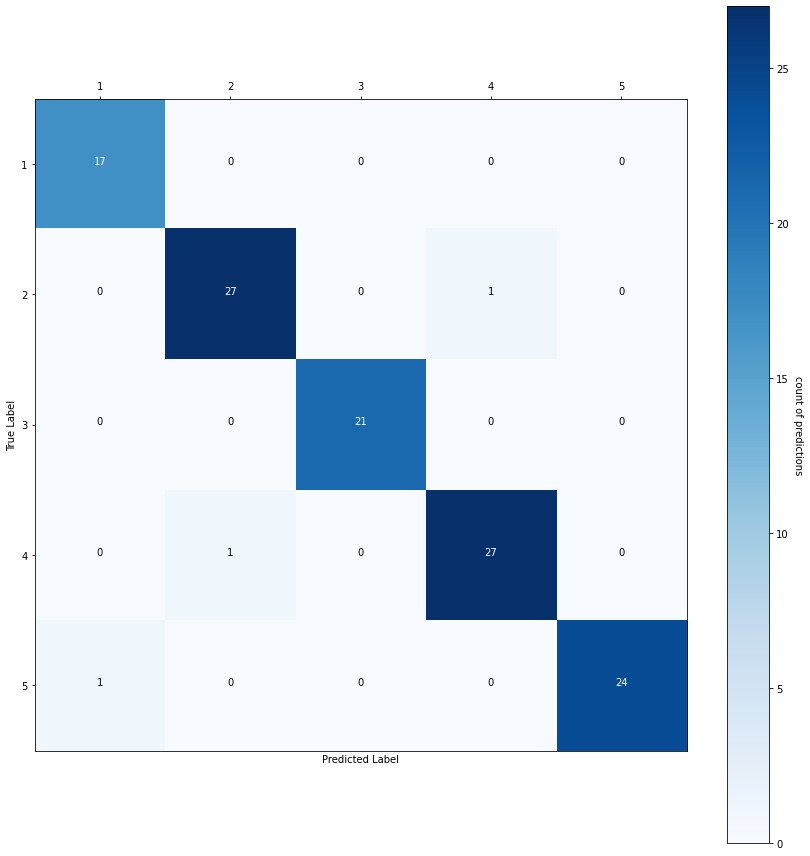

In [14]:
y_pred_classes = np.argmax(predictions, axis=1)

y_true = y_val
errors = (y_pred_classes - y_true != 0)

labels = ['1','2','3','4','5']

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = predictions[errors]
y_true_errors = y_true[errors]
x_test_errors = []

cm = sklearn.metrics.confusion_matrix(y_true, y_pred_classes)
thresh = cm.max() / 2,

fig, ax = plt.subplots(figsize = (12, 12))
im, cbar = stats.heatmap(cm, labels, labels, ax = ax,
cmap = plt.cm.Blues, cbarlabel = 'count of predictions')

texts = stats.annotate_heatmap(im, data = cm, threshold = thresh)

fig.tight_layout()
plt.show()
fig.savefig('statistics/heatmap.png', dpi=72)

## Classification report

In [15]:
target_names = ['class 1', 'class 2', 'class 3','class 4', 'class 5']
classification_report = sklearn.metrics.classification_report(pred_labels, y_val, target_names=target_names)

## Salvando Relatórios

In [16]:
arq = open("./statistics/relatorio.txt", 'w')
arq.write(f"Modelo:Augumentation 10 Camadas de Convolução\n\nEvaluate:\n{results}\n\n Matriz de Confusão:\n{confusion_matrix}\n\nClassification Report:\n{classification_report}\n\n")
arq.close()